**Importing Necessary Packages**

In [9]:
import pandas as pd
import numpy as np
import yfinance as yf
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import cvxopt as opt
from cvxopt import blas, solvers

**Loading In Stock Datasets**

In [10]:
# List of Tickers for 10 Stocks being Analyzed
symbols = ['AAPL', 'AMZN', 'META','TSLA','XOM','BAC','KO','VZ','NKE','PLTR']
# Initializing Time Period for Analysis
start_date = "2022-07-01"
end_date = "2024-07-01"
# Downloading Relevant Data
stock_data = yf.download(symbols, start_date, end_date)
stock_data.head()

[*********************100%%**********************]  10 of 10 completed


Price        Adj Close                                                \
Ticker            AAPL        AMZN        BAC         KO        META   
Date                                                                   
2022-07-01  137.375763  109.559998  29.837000  60.564766  159.701813   
2022-07-05  139.976334  113.500000  29.534470  59.529964  167.845093   
2022-07-06  141.321136  114.330002  29.288666  59.652256  169.421860   
2022-07-07  144.712769  116.330002  30.120623  59.181892  171.836899   
2022-07-08  145.395050  115.540001  30.054445  59.398258  170.529587   

Price                                                            ...  \
Ticker             NKE   PLTR        TSLA         VZ        XOM  ...   
Date                                                             ...   
2022-07-01   98.559288   9.27  227.263336  44.486488  81.745445  ...   
2022-07-05  101.617966  10.07  233.066666  44.296959  79.187111  ...   
2022-07-06  101.530304   9.80  231.733337  44.374493  77.758553  ...   
2022-07-07  105.329269  10.18  244.543335  44.234928  80.242195  ...   
2022-07-08  105.134468  10.17  250.763336  44.043026  80.372910  ...   

Price         Volume                                                   \
Ticker          AAPL      AMZN       BAC        KO      META      NKE   
Date                                                                    
2022-07-01  71051600  73021200  40236100  15143200  31423900  7934300   
2022-07-05  73353800  76583700  47411800  15921200  28618600  9948800   
2022-07-06  74064300  66958900  35933700  13450500  23085900  6432900   
2022-07-07  66253700  57872300  40137900  14828400  24083400  7633900   
2022-07-08  64547800  45719700  31153800  11311500  19249200  5938600   

Price                                                
Ticker          PLTR       TSLA        VZ       XOM  
Date                                                 
2022-07-01  33504400   74460300  14189300  26327900  
2022-07-05  55854800   84581100  19675600  34591100  
2022-07-06  54604300   71853600  14938900  33375700  
2022-07-07  35672500   81930600  13617100  23817400  
2022-07-08  36737100  101854200  13959200  17673800  

[5 rows x 60 columns]

**Plotting Adjusted Closing Prices over Time**

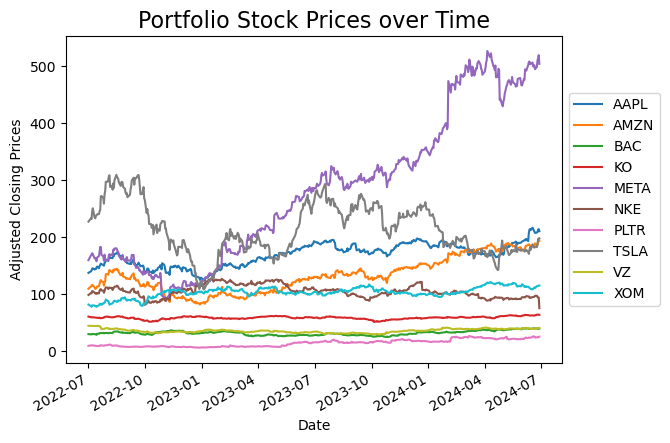

In [11]:
# Singling Out Adj Closing Price Information
adj_closing_prices = stock_data['Adj Close'].copy()

#Plot of Closing Prices over 2 Year Historical Period
adj_closing_prices.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Prices")
plt.title("Portfolio Stock Prices over Time", fontsize=16)
plt.savefig('Stock Prices.png')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Calculating Mean Daily Returns for Each Stock over Time Period**

In [12]:
# Dataset of daily returns for each stock
daily_returns = stock_data['Adj Close'].pct_change().copy()

# Average Daily Returns for each Stock
daily_mean_returns = daily_returns.mean()
daily_mean_returns

Ticker
AAPL    0.000988
AMZN    0.001382
BAC     0.000715
KO      0.000139
META    0.002737
NKE    -0.000293
PLTR    0.002865
TSLA    0.000335
VZ     -0.000082
XOM     0.000814
dtype: float64

**Creating a Bar Chart Displaying Rate of Return for Each Stock**

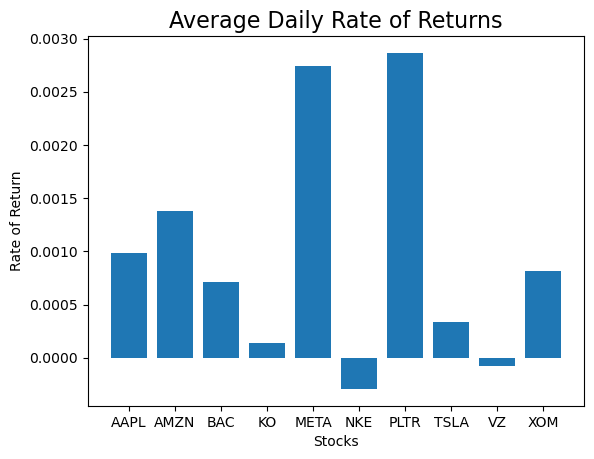

In [13]:
# Setting Height Values for Bars
height = []
for key in daily_mean_returns.keys():
    height.append(daily_mean_returns[key])

# Setting X Values
x_pos = np.arange(len(daily_mean_returns.keys()))                  
  
plt.bar(x_pos, height)

# Changing X Tick Labels to Relevant Stock Tickers
plt.xticks(x_pos, daily_mean_returns.keys())

# Labeling Bar Chart
plt.title("Average Daily Rate of Returns", fontsize=16)
plt.ylabel("Rate of Return")
plt.style.use('default')
plt.xlabel("Stocks")
plt.savefig('Average Returns.png')
plt.show()

*Note: META and PLTR have by far the highest average rates of return over the historical time period, making them the most attractive investments through this statistical metric. NKE and VZ both have a negative average return over the time period, making them the least attractive investments by this metric.*

**Calculating Standard Deviations of Returns for Each Stock**

In [14]:
daily_stddev = daily_returns.std()
daily_stddev

Ticker
AAPL    0.016392
AMZN    0.022291
BAC     0.016773
KO      0.008934
META    0.029556
NKE     0.021739
PLTR    0.042059
TSLA    0.035027
VZ      0.014320
XOM     0.016083
dtype: float64

**Creating Bar Chart with Standard Deviations for Each Stock**

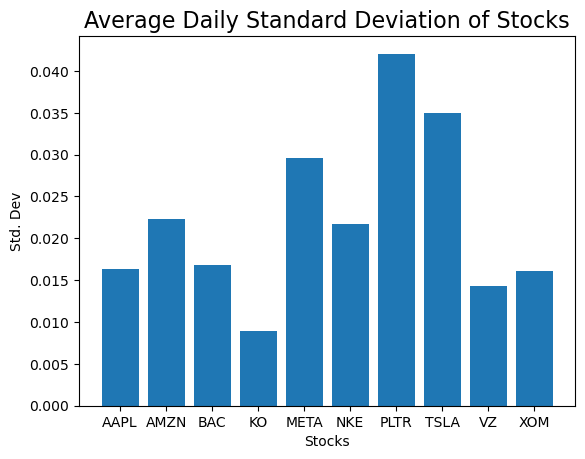

In [15]:
# Setting Height Values for Bars
height = []
for key in daily_stddev.keys():
    height.append(daily_stddev[key])

# Setting X Values
x_pos = np.arange(len(daily_stddev.keys()))                  
                  
plt.bar(x_pos, height)

# Changing X Tick Labels to Relevant Stock Tickers
plt.xticks(x_pos, daily_stddev.keys())

# Labeling Bar Chart
plt.title("Average Daily Standard Deviation of Stocks", fontsize=16)
plt.ylabel("Std. Dev")
plt.xlabel("Stocks")
plt.savefig('Average Std Dev.png')
plt.show()

*Note: Stocks like PLTR, TSLA, and META have the highest standard deviations in returns, meaning they are the riskiest stocks, with the potential for the highest or lowest returns. Stocks like KO, VZ, and XOM can be looked at as the safest stocks of the bunch, which could be preferable for more risk adverse investors.*

**Calculating Correlations Between Each of the Stocks**

In [16]:
stock_corr = daily_returns.corr()
# Rounding data to 4 decimal places for easier reading
stock_corr = stock_corr.round(4)
stock_corr

Ticker,AAPL,AMZN,BAC,KO,META,NKE,PLTR,TSLA,VZ,XOM
Ticker,,,,,,,,,,
AAPL,1.0000,0.5165,0.2974,0.3542,0.4566,0.4394,0.3708,0.4533,0.1880,0.2030
AMZN,0.5165,1.0000,0.2937,0.2156,0.5897,0.3999,0.4361,0.3790,0.1147,0.1109
BAC,0.2974,0.2937,1.0000,0.3348,0.2563,0.3415,0.2935,0.2917,0.3341,0.4142
KO,0.3542,0.2156,0.3348,1.0000,0.1085,0.3522,0.0590,0.1446,0.3495,0.2026
META,0.4566,0.5897,0.2563,0.1085,1.0000,0.2696,0.3313,0.2560,0.1553,0.0402
NKE,0.4394,0.3999,0.3415,0.3522,0.2696,1.0000,0.3043,0.2397,0.2138,0.2406
PLTR,0.3708,0.4361,0.2935,0.0590,0.3313,0.3043,1.0000,0.4144,0.0781,0.1148
TSLA,0.4533,0.3790,0.2917,0.1446,0.2560,0.2397,0.4144,1.0000,0.0676,0.0764
VZ,0.1880,0.1147,0.3341,0.3495,0.1553,0.2138,0.0781,0.0676,1.0000,0.2101


**Heatmap of Results for Improved Visualization**

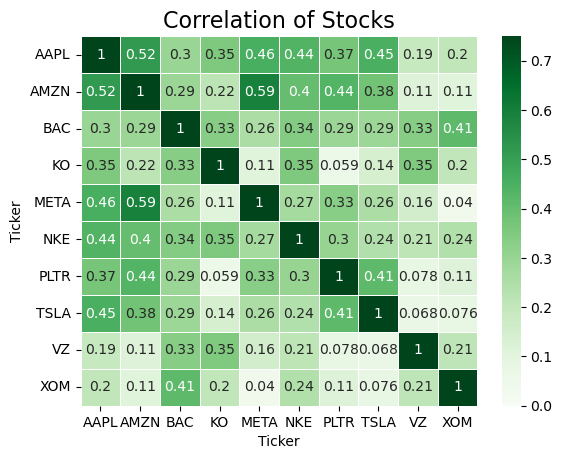

In [17]:
ax = sns.heatmap(stock_corr, annot=True, linewidth=.5, cmap='Greens', vmin=0, vmax=.75)
ax.set_title("Correlation of Stocks", fontsize=16)
plt.savefig('Correlation Heatmap.png')
plt.show()

*Note: Correlation between stocks can be an incredibly important statistic when it comes to diversifying some risk out of any portfolio. Some of the sets of stocks that have the strongest correlation with each other out of this data is META and AMZN, as well as AAPL and AMZN. AAPL also has some decent correlation with NKE, META, and TSLA, which could be important to note. However, even the strongest correlations between any two stocks in the portfolio can be considered relatively moderate.*

*Meanwhile, although there are no pairs of stocks with negative correlation, there are some with almost no correlation to each other, such as XOM and META, VZ with both TSLA and PLTR, as well as the pairing of KO and PLTR. This can be important information for diversifying away unsystematic risk in the optimal portfolio.*

**Creating Covariance Matrix of Stock Data**

In [18]:
stock_cov = daily_returns.cov()
stock_cov

Ticker,AAPL,AMZN,BAC,KO,META,NKE,PLTR,TSLA,VZ,XOM
Ticker,,,,,,,,,,
AAPL,0.000269,0.000189,0.000082,0.000052,0.000221,0.000157,0.000256,0.000260,0.000044,0.000054
AMZN,0.000189,0.000497,0.000110,0.000043,0.000389,0.000194,0.000409,0.000296,0.000037,0.000040
BAC,0.000082,0.000110,0.000281,0.000050,0.000127,0.000125,0.000207,0.000171,0.000080,0.000112
KO,0.000052,0.000043,0.000050,0.000080,0.000029,0.000068,0.000022,0.000045,0.000045,0.000029
META,0.000221,0.000389,0.000127,0.000029,0.000874,0.000173,0.000412,0.000265,0.000066,0.000019
NKE,0.000157,0.000194,0.000125,0.000068,0.000173,0.000473,0.000278,0.000183,0.000067,0.000084
PLTR,0.000256,0.000409,0.000207,0.000022,0.000412,0.000278,0.001769,0.000611,0.000047,0.000078
TSLA,0.000260,0.000296,0.000171,0.000045,0.000265,0.000183,0.000611,0.001227,0.000034,0.000043
VZ,0.000044,0.000037,0.000080,0.000045,0.000066,0.000067,0.000047,0.000034,0.000205,0.000048


**Heatmap of Results for Improved Visualization**

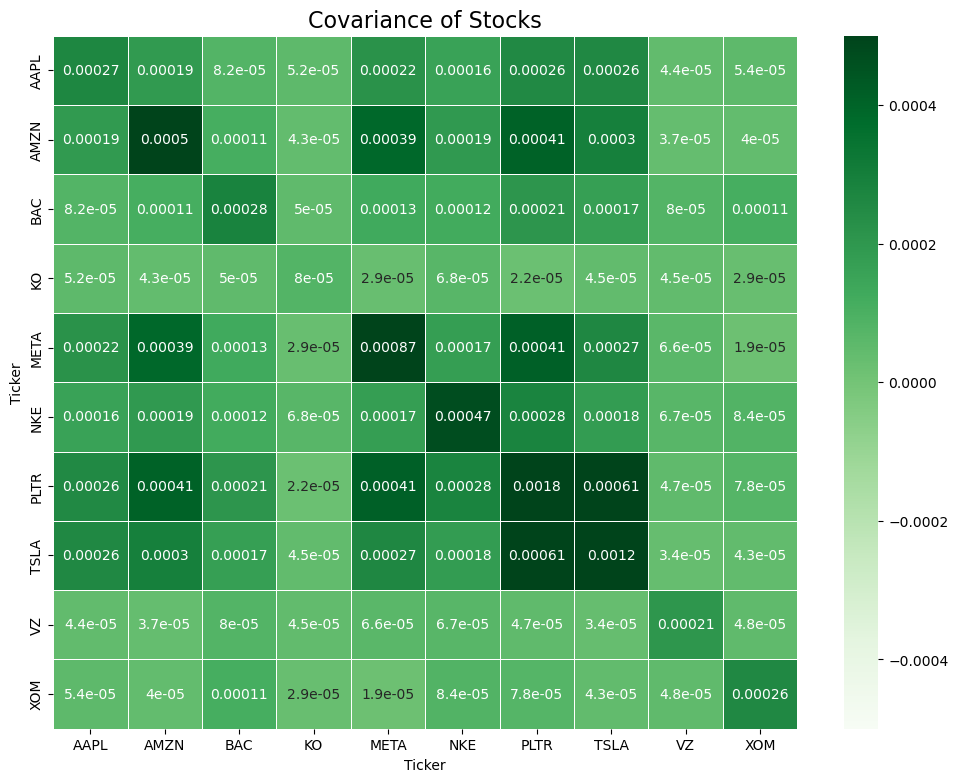

In [19]:
plt.figure(figsize=(12,9))
ax = sns.heatmap(stock_cov, annot=True, linewidth=.5, cmap='Greens', vmin=-0.0005, vmax=0.0005)
ax.set_title("Covariance of Stocks", fontsize=16)
plt.savefig('Covariance Heatmap.png')
plt.show()

**Defining Functions for Further Mean-Variance Portfolio Analysis**

In [20]:
def return_portfolios(expected_returns, cov_matrix):
    port_returns = []
    port_volatility = []
    stock_weights = []
    
    selected = (expected_returns.axes)[0]
    
    num_assets = len(selected) 
    num_portfolios = 5000
    
    for single_portfolio in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        returns = np.dot(weights, expected_returns)
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        port_returns.append(returns)
        port_volatility.append(volatility)
        stock_weights.append(weights)
    
    portfolio = {'Returns': port_returns,
                 'Volatility': port_volatility}
    
    for counter,symbol in enumerate(selected):
        portfolio[symbol +' Weight'] = [Weight[counter] for Weight in stock_weights]
    
    df = pd.DataFrame(portfolio)
    
    column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]
    
    df = df[column_order]
   
    return df
  
def optimal_portfolio(returns):
    n = returns.shape[1]
    returns = np.transpose(returns.values)

    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)

    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

**Randomly Generating 5000 Portfolios and Finding Efficient Frontier**

In [21]:
random_portfolios = return_portfolios(daily_mean_returns, stock_cov)

selected = list(adj_closing_prices.columns[1:])
selected_returns = adj_closing_prices[selected].pct_change()
weights, returns, risks = optimal_portfolio(selected_returns[1:])

     pcost       dcost       gap    pres   dres
 0: -9.5770e-04 -1.0028e+00  1e+00  2e-16  3e+00
 1: -9.6004e-04 -1.2832e-02  1e-02  7e-17  4e-02
 2: -1.1501e-03 -2.9268e-03  2e-03  6e-17  6e-03
 3: -2.5972e-03 -3.5934e-03  1e-03  7e-16  1e-03
 4: -2.7612e-03 -2.7860e-03  2e-05  2e-16  3e-05
 5: -2.7760e-03 -2.7769e-03  9e-07  2e-16  8e-07
 6: -2.7764e-03 -2.7765e-03  5e-08  1e-16  1e-08
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.5649e-04 -1.0028e+00  1e+00  2e-16  3e+00
 1: -9.5883e-04 -1.2827e-02  1e-02  2e-16  4e-02
 2: -1.1485e-03 -2.9222e-03  2e-03  2e-16  6e-03
 3: -2.5923e-03 -3.5788e-03  1e-03  2e-16  1e-03
 4: -2.7528e-03 -2.7759e-03  2e-05  1e-16  3e-05
 5: -2.7667e-03 -2.7672e-03  4e-07  2e-16  5e-07
 6: -2.7670e-03 -2.7670e-03  4e-09  3e-16  5e-09
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.5514e-04 -1.0028e+00  1e+00  0e+00  3e+00
 1: -9.5748e-04 -1.2823e-02  1e-02  9e-17  4e-02
 2: -1.1468e-03 -2.9170e

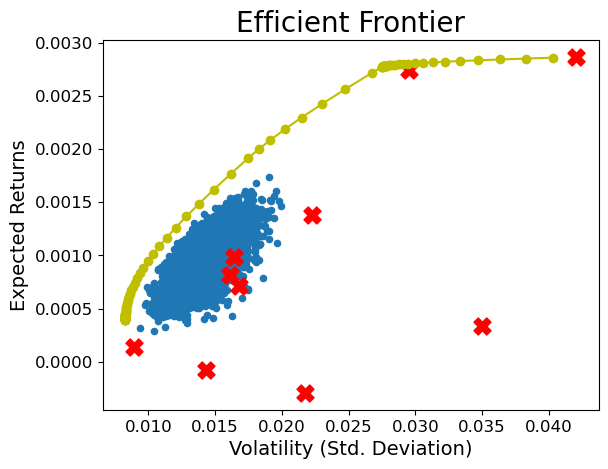

In [31]:
random_portfolios.plot.scatter(x='Volatility', y='Returns', fontsize=12)
try:
	plt.plot(risks, returns, 'y-o')
except:
  pass
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=20)
single_asset_std=np.sqrt(np.diagonal(stock_cov))
plt.scatter(single_asset_std,daily_mean_returns,marker='X',color='red',s=150)
plt.savefig('Efficient Frontier.png')
plt.show()

**Updated Efficient Frontier Graph**

*Note: TSLA, NKE, BAC, VZ are removed from portfolio for optimization purposes after thorough statistical analysis. Reasoning shown in powerpoint slides.
Final Stocks: AAPL, AMZN, META, XOM, KO, PLTR*

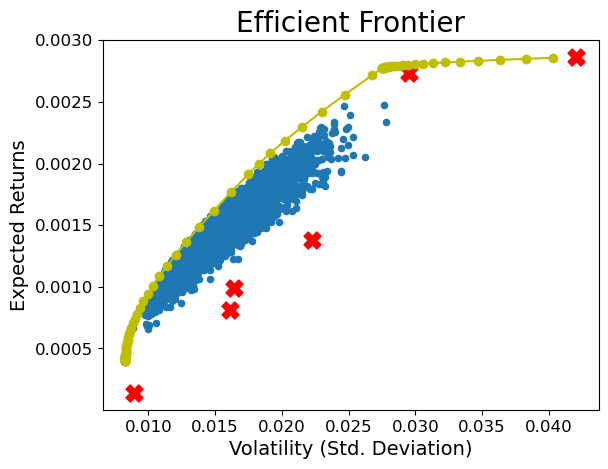

In [32]:
random_portfolios2.plot.scatter(x='Volatility', y='Returns', fontsize=12)
try:
	plt.plot(risks, returns, 'y-o')
except:
  pass
plt.ylabel('Expected Returns',fontsize=14)
plt.xlabel('Volatility (Std. Deviation)',fontsize=14)
plt.title('Efficient Frontier', fontsize=20)
single_asset_std=np.sqrt(np.diagonal(stock_cov2))
plt.scatter(single_asset_std,daily_mean_returns2,marker='X',color='red',s=150)
plt.savefig('Efficient Frontier.png')
plt.show()